# DA21-C ML Assignment 5


Instructions
Part A:
Questions:

For a simple linear regression model, the equation is given by y = b0 + b1*x. If the value of b0 is 4 and the value of b1 is 3, what is the predicted value of y for x=2?
Consider a multiple linear regression model with three independent variables x1, x2, and x3. The coefficients for these variables are given by b1=2, b2=3, and b3=4, respectively. What is the equation of the regression model?

In [1602]:
y = 4+3*2
y

10

y = b0+2x1+3x2+4x3

In [1603]:
import numpy as np
import pandas as pd

In [1604]:
df = pd.read_csv('scrap price.csv')


In [1605]:
df.head().T

,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
symboling,3.0,3.0,1.0,2.0,2.0
name,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltypes,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumbers,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheels,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


In [1606]:
df.drop(['Unnamed: 26','Unnamed: 27','carlength','carwidth','carheight'],axis=1,inplace=True)

In [1607]:
desc = pd.DataFrame(index = list(df))
desc['count'] = df.shape[0]
desc['null_cnt'] = df.isnull().sum()
desc['nunique'] = df.nunique()
desc['dtype'] = df.dtypes
desc = pd.concat([desc,df.describe().T],axis=1)
desc

,count,null_cnt,nunique,dtype,count,mean,std,min,25%,50%,75%,max
ID,209,4,205,float64,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,209,4,6,float64,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
name,209,4,147,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltypes,209,4,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,209,4,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumbers,209,4,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
carbody,209,4,5,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheels,209,4,3,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,209,4,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,209,4,57,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1608]:
df[df['ID'].isnull()]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1609]:
df = df.drop_duplicates()

In [1610]:
df = df.drop([191])

In [1611]:
df['comp_name'] = df['name'].str.split()

In [1612]:
df['comp_name']

0            [alfa-romero, giulia]
1           [alfa-romero, stelvio]
2      [alfa-romero, Quadrifoglio]
3                  [audi, 100, ls]
4                    [audi, 100ls]
                  ...             
204            [volvo, 145e, (sw)]
205                 [volvo, 144ea]
206                 [volvo, 244dl]
207                   [volvo, 246]
208                 [volvo, 264gl]
Name: comp_name, Length: 205, dtype: object

In [1613]:
def comp_name(data):
    return data[0] 
df['comp_name']=df['comp_name'].apply(comp_name)

In [1614]:
df['comp_name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [1615]:
df['comp_name'] = df['comp_name'].str.replace("maxda","mazda")
df['comp_name'] = df['comp_name'].str.replace("nissan","Nissan")
df['comp_name'] = df['comp_name'].str.replace("porcshce","porsche")
df['comp_name'] = df['comp_name'].str.replace("vokswagen","volkswagen")
df['comp_name'] = df['comp_name'].str.replace("vw","volkswagen")
df['comp_name'] = df['comp_name'].str.replace("toyouta","toyota")

In [1616]:
for i in ['symboling','fueltypes','aspiration','doornumbers','carbody','drivewheels','enginelocation','enginetype','cylindernumber','fuelsystem']:
    l=[]
    l.append(str(i))
    l.append(df[i].unique())
    print(*l)
    l.clear()

symboling [ 3.  1.  2.  0. -1. -2.]
fueltypes ['gas' 'diesel']
aspiration ['std' 'turbo']
doornumbers ['two' 'four']
carbody ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheels ['rwd' 'fwd' '4wd']
enginelocation ['front' 'rear']
enginetype ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [1617]:
df['drivewheels']=df['drivewheels'].str.replace("4wd","fwd")
df['cylindernumber']=df['cylindernumber'].str.replace("four",'4')
df['cylindernumber']=df['cylindernumber'].str.replace("six",'6')
df['cylindernumber']=df['cylindernumber'].str.replace("five",'5')
df['cylindernumber']=df['cylindernumber'].str.replace("three",'3')
df['cylindernumber']=df['cylindernumber'].str.replace("twelve",'12')
df['cylindernumber']=df['cylindernumber'].str.replace("two",'2')
df['cylindernumber']=df['cylindernumber'].str.replace("eight",'8')
df['doornumbers']=df['doornumbers'].str.replace("two",'2')
df['doornumbers']=df['doornumbers'].str.replace("four",'4')

In [1618]:
noise=[]
for i in ['doornumbers','cylindernumber','wheelbase',
          'curbweight','enginesize','stroke','peakrpm','citympg','highwaympg']:
    noise.append(str(i))
    for j in df[i]:
        try:
            float(j)
        except:
            noise.append(j)
    print(noise)
    
    noise.clear()

['doornumbers']
['cylindernumber']
['wheelbase', '#$%', '#$', '"69*/"', '$%98']
['curbweight', '(OP*/)']
['enginesize', 'po/*', '$%98']
['stroke', 'E#$']
['peakrpm', '(OP*/)']
['citympg', 'po/*', '#$']
['highwaympg', '$%98']


In [1619]:
df['wheelbase']=df['wheelbase'].str.replace("*/",'',regex=False)
df['wheelbase']=df['wheelbase'].str.replace("$%",'',regex=False)
df['wheelbase']=df['wheelbase'].str.replace('"','',regex=False)
df['highwaympg']=df['highwaympg'].str.replace('$%','',regex=False)
df['enginesize']=df['enginesize'].str.replace('$%','',regex=False)

In [1620]:
for i in ['doornumbers','cylindernumber','wheelbase',
          'curbweight','enginesize','stroke','peakrpm','citympg','highwaympg']:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [1621]:
df.drop('ID',axis=1,inplace=True)

In [1622]:
df = df.fillna(method='bfill')

In [1623]:
desc = pd.DataFrame(index = list(df))
desc['count'] = df.shape[0]
desc['null_cnt'] = df.isnull().sum()
desc['nunique'] = df.nunique()
desc['dtype'] = df.dtypes
desc = pd.concat([desc,df.describe().T],axis=1)
desc

,count,null_cnt,nunique,dtype,count,mean,std,min,25%,50%,75%,max
symboling,205,0,6,float64,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
name,205,0,147,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltypes,205,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,205,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumbers,205,0,2,int64,205.0,3.121951,0.994966,2.00,2.00,4.00,4.00,4.00
carbody,205,0,5,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheels,205,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,205,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,205,0,55,float64,205.0,98.673171,6.334229,69.00,94.50,97.00,102.40,120.90
curbweight,205,0,171,float64,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00


C:\Users\farzi\AppData\Local\Temp\ipykernel_980\960126331.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mat  = df.corr()


<Axes: >

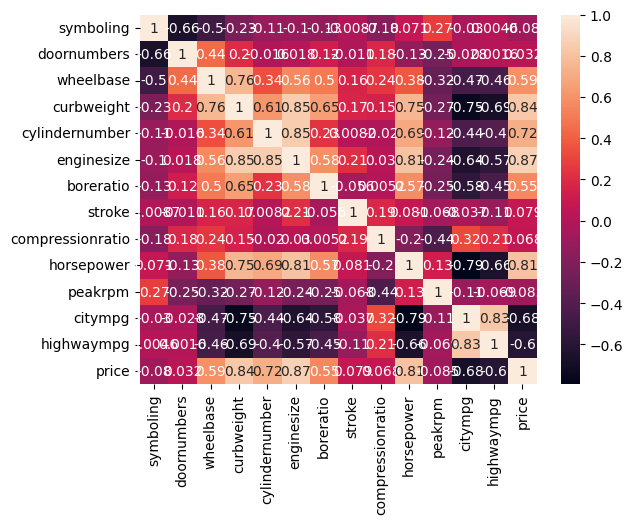

In [1624]:
import seaborn as sns
mat  = df.corr()
sns.heatmap(mat,annot=True)

<Axes: xlabel='enginesize', ylabel='price'>

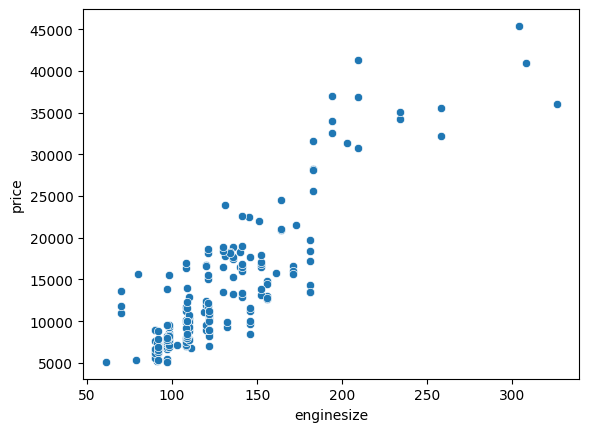

In [1625]:
sns.scatterplot(df,x=df['enginesize'],y=df['price'])

In [1626]:
#outlier analysis
import matplotlib.pyplot as plt

C:\Users\farzi\AppData\Local\Temp\ipykernel_980\1920416608.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['boreratio'])


<Axes: xlabel='boreratio', ylabel='Density'>

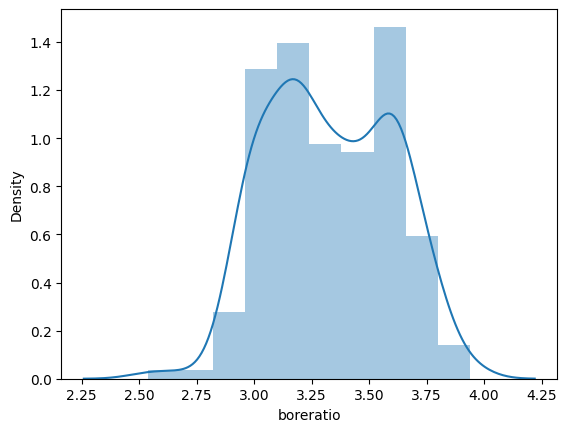

In [1627]:
sns.distplot(df['boreratio'])

not normally distributed

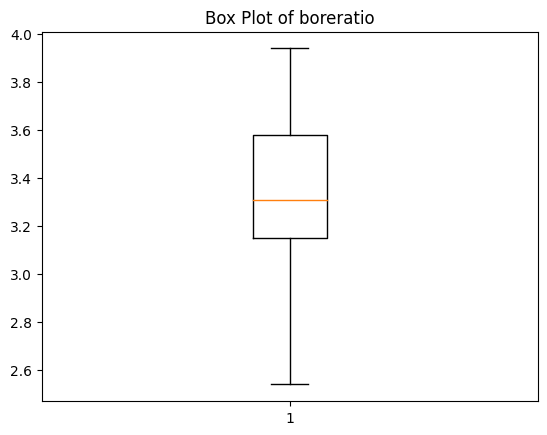

In [1628]:
plt.boxplot(df['boreratio'])
plt.title('Box Plot of boreratio')
plt.show()

In [1629]:
q25 = df['boreratio'].quantile(0.25)
q75 = df['boreratio'].quantile(0.75)
iqr = q75 - q25
lower_bound = q25 - 1.5 * iqr
upper_bound = q75 + 1.5 * iqr
# df_no_outliers = df[(df['boreratio'] >= lower_bound) & (df['boreratio'] <= upper_bound)]


C:\Users\farzi\AppData\Local\Temp\ipykernel_980\3651417679.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['compressionratio'])


<Axes: xlabel='compressionratio', ylabel='Density'>

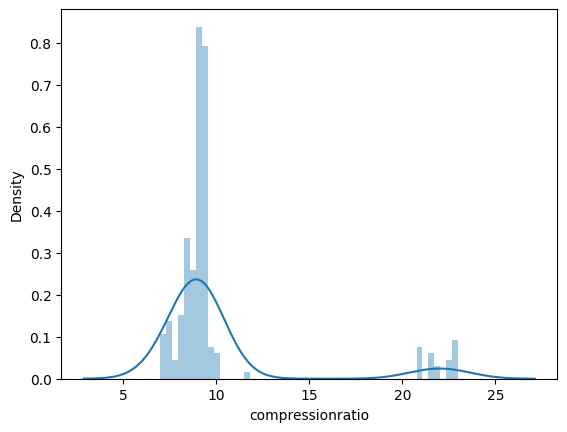

In [1630]:
sns.distplot(df['compressionratio'])

not normal

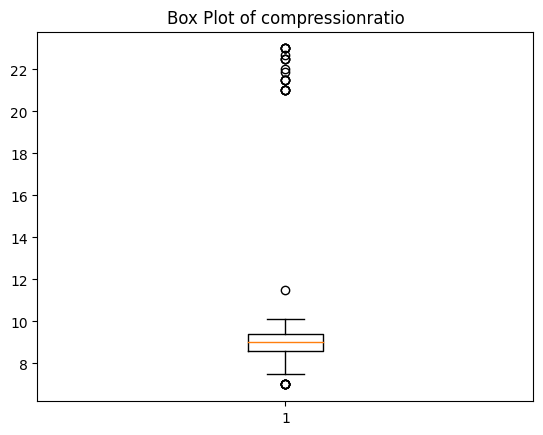

In [1631]:
plt.boxplot(df['compressionratio'])
plt.title('Box Plot of compressionratio')
plt.show()

In [1632]:
q25 = df['compressionratio'].quantile(0.25)
q75 = df['compressionratio'].quantile(0.75)
iqr = q75 - q25
lower_bound_cr = q25 - 1.5 * iqr
upper_bound_cr = q75 + 1.5 * iqr
# df_no_outliers = df[(df['compressionratio'] >= lower_bound_cr) & (df['compressionratio'] <= upper_bound_cr)]


C:\Users\farzi\AppData\Local\Temp\ipykernel_980\3228217076.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['horsepower'])


<Axes: xlabel='horsepower', ylabel='Density'>

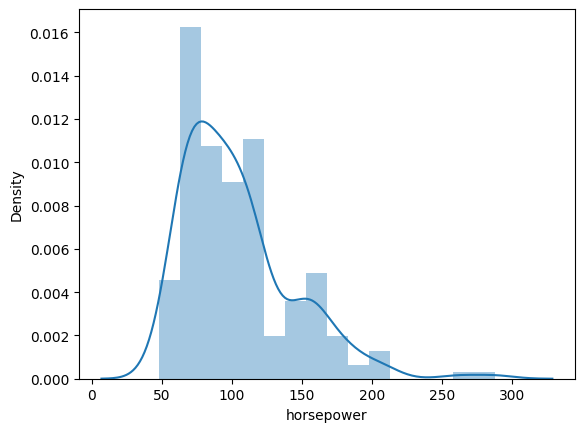

In [1633]:
sns.distplot(df['horsepower'])

not normal

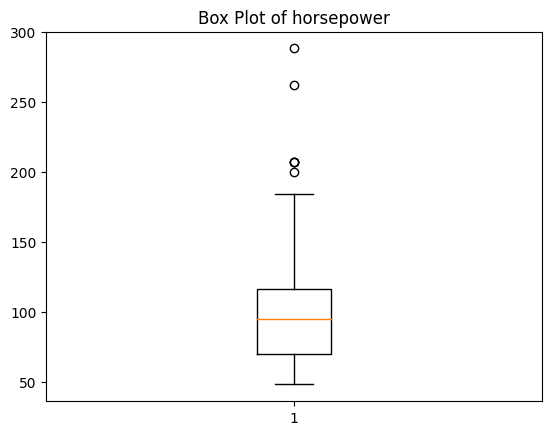

In [1634]:
plt.boxplot(df['horsepower'])
plt.title('Box Plot of horsepower')
plt.show()

In [1635]:
q25 = df['horsepower'].quantile(0.25)
q75 = df['horsepower'].quantile(0.75)
iqr = q75 - q25
lower_bound_hp = q25 - 1.5 * iqr
upper_bound_hp = q75 + 1.5 * iqr
df_no_outliers = df[((df['horsepower'] >= lower_bound_hp) & (df['horsepower'] <= upper_bound_hp))&
                    ((df['compressionratio'] >= lower_bound_cr) & (df['compressionratio'] <= upper_bound_cr))&
                    ((df['boreratio'] >= lower_bound) & (df['boreratio'] <= upper_bound))]


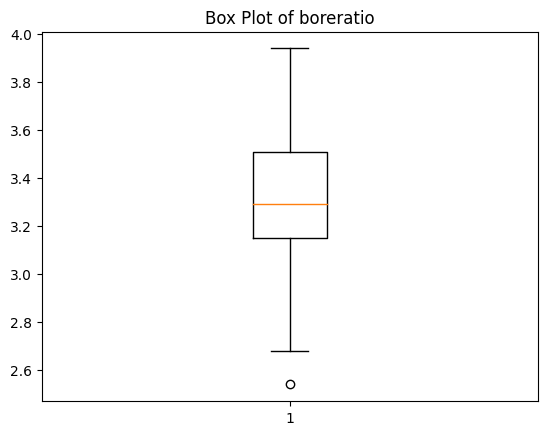

In [1636]:
plt.boxplot(df_no_outliers['boreratio'])
plt.title('Box Plot of boreratio')
plt.show()

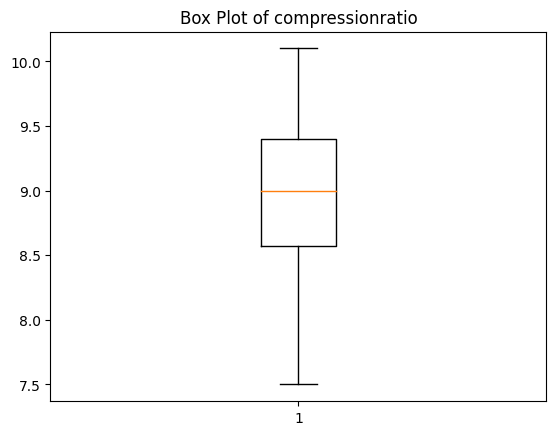

In [1637]:
plt.boxplot(df_no_outliers['compressionratio'])
plt.title('Box Plot of compressionratio')
plt.show()

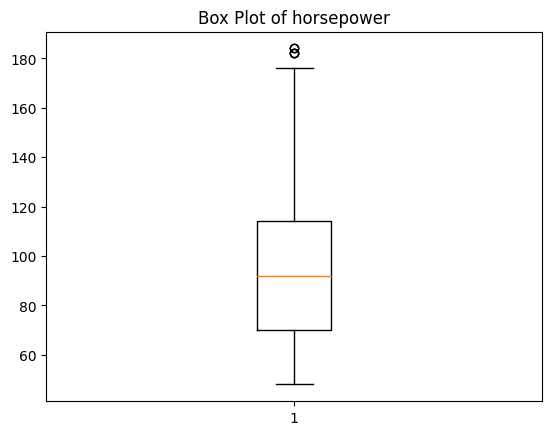

In [1638]:
plt.boxplot(df_no_outliers['horsepower'])
plt.title('Box Plot of horsepower')
plt.show()

In [1639]:
desc = pd.DataFrame(index = list(df_no_outliers))
desc['count'] = df_no_outliers.shape[0]
desc['null_cnt'] = df_no_outliers.isnull().sum()
desc['nunique'] = df_no_outliers.nunique()
desc['dtype'] = df_no_outliers.dtypes
desc = pd.concat([desc,df_no_outliers.describe().T],axis=1)
desc

,count,null_cnt,nunique,dtype,count,mean,std,min,25%,50%,75%,max
symboling,172,0,6,float64,172.0,0.819767,1.193091,-2.00,0.000,1.000,2.00,3.00
name,172,0,125,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fueltypes,172,0,1,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,172,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doornumbers,172,0,2,int64,172.0,3.127907,0.994682,2.00,2.000,4.000,4.00,4.00
carbody,172,0,5,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drivewheels,172,0,2,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
enginelocation,172,0,1,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheelbase,172,0,48,float64,172.0,98.159302,6.036320,69.00,94.500,96.500,100.60,120.90
curbweight,172,0,144,float64,172.0,2480.558140,491.627244,1488.00,2105.250,2385.000,2811.75,4066.00


In [1640]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [1641]:
num_cols = []
not_num_cols = []

for i in df_no_outliers.columns:
    dtype_str = str(df_no_outliers[i].dtype)  # Convert the dtype to a string
    if ('int' in dtype_str) or ('float' in dtype_str):
        num_cols.append(i)
    else:
        not_num_cols.append(i)


In [1642]:
num_cols

['symboling',
 'doornumbers',
 'wheelbase',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [1643]:
num_cols.remove('price')

In [1644]:
not_num_cols

['name',
 'fueltypes',
 'aspiration',
 'carbody',
 'drivewheels',
 'enginelocation',
 'enginetype',
 'fuelsystem',
 'comp_name']

In [1645]:
to_scale=[]
for i in num_cols:
    nuniq =len(df_no_outliers[i].unique())
    # print(nuniq)
    if nuniq>8:
        to_scale.append(i)


In [1646]:
scaler = StandardScaler()
df_no_outliers[to_scale] = scaler.fit_transform(df_no_outliers[to_scale])
df_no_outliers

C:\Users\farzi\AppData\Local\Temp\ipykernel_980\3450072878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[to_scale] = scaler.fit_transform(df_no_outliers[to_scale])


,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,curbweight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,comp_name
0,3.0,alfa-romero giulia,gas,std,2,convertible,rwd,front,-1.588254,0.137581,...,mpfi,0.631722,-1.769988,0.165141,0.326721,-0.430829,-0.681179,-0.505688,13495.0,alfa-romero
1,3.0,alfa-romero stelvio,gas,std,2,convertible,rwd,front,-1.588254,0.137581,...,mpfi,0.631722,-1.769988,0.165141,0.326721,-0.430829,-0.681179,-0.505688,16500.0,alfa-romero
2,1.0,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,-0.607984,0.698581,...,mpfi,-2.374878,0.818882,0.165141,1.643575,-0.430829,-0.996133,-0.626997,16500.0,alfa-romero
3,2.0,audi 100 ls,gas,std,4,sedan,fwd,front,0.272598,-0.292859,...,mpfi,-0.433908,0.589488,1.976637,0.051100,0.719832,-0.208748,-0.141762,13950.0,audi
4,2.0,audi 100ls,gas,std,4,sedan,fwd,front,0.206139,0.700621,...,mpfi,-0.433908,0.589488,-1.646355,0.449219,0.719832,-1.153610,-1.112232,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-1.0,volvo diesel,gas,turbo,4,wagon,rwd,front,1.020262,1.379942,...,mpfi,1.202596,-0.229775,-2.552103,1.888571,-0.200697,-1.311087,-1.112232,18950.0,volvo
204,-1.0,volvo 145e (sw),gas,std,4,sedan,rwd,front,1.817770,0.961742,...,mpfi,1.811528,-0.229775,1.070889,0.418594,0.489700,-0.366225,-0.384379,16845.0,volvo
205,-1.0,volvo 144ea,gas,turbo,4,sedan,rwd,front,1.817770,1.159622,...,mpfi,1.811528,-0.229775,-0.378308,1.827322,0.259568,-0.996133,-0.748306,19045.0,volvo
206,-1.0,volvo 244dl,gas,std,4,sedan,rwd,front,1.817770,1.084142,...,mpfi,1.050363,-1.147349,-0.197158,1.031085,0.719832,-1.153610,-0.990923,21485.0,volvo


In [1647]:
to_encode = ['doornumbers']
to_encode

['doornumbers']

In [1648]:
encoder=LabelEncoder()
df_no_outliers[to_encode] = df_no_outliers[to_encode].apply(encoder.fit_transform)

C:\Users\farzi\AppData\Local\Temp\ipykernel_980\2564664026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[to_encode] = df_no_outliers[to_encode].apply(encoder.fit_transform)


In [1649]:
df_no_outliers

,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,curbweight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,comp_name
0,3.0,alfa-romero giulia,gas,std,0,convertible,rwd,front,-1.588254,0.137581,...,mpfi,0.631722,-1.769988,0.165141,0.326721,-0.430829,-0.681179,-0.505688,13495.0,alfa-romero
1,3.0,alfa-romero stelvio,gas,std,0,convertible,rwd,front,-1.588254,0.137581,...,mpfi,0.631722,-1.769988,0.165141,0.326721,-0.430829,-0.681179,-0.505688,16500.0,alfa-romero
2,1.0,alfa-romero Quadrifoglio,gas,std,0,hatchback,rwd,front,-0.607984,0.698581,...,mpfi,-2.374878,0.818882,0.165141,1.643575,-0.430829,-0.996133,-0.626997,16500.0,alfa-romero
3,2.0,audi 100 ls,gas,std,1,sedan,fwd,front,0.272598,-0.292859,...,mpfi,-0.433908,0.589488,1.976637,0.051100,0.719832,-0.208748,-0.141762,13950.0,audi
4,2.0,audi 100ls,gas,std,1,sedan,fwd,front,0.206139,0.700621,...,mpfi,-0.433908,0.589488,-1.646355,0.449219,0.719832,-1.153610,-1.112232,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-1.0,volvo diesel,gas,turbo,1,wagon,rwd,front,1.020262,1.379942,...,mpfi,1.202596,-0.229775,-2.552103,1.888571,-0.200697,-1.311087,-1.112232,18950.0,volvo
204,-1.0,volvo 145e (sw),gas,std,1,sedan,rwd,front,1.817770,0.961742,...,mpfi,1.811528,-0.229775,1.070889,0.418594,0.489700,-0.366225,-0.384379,16845.0,volvo
205,-1.0,volvo 144ea,gas,turbo,1,sedan,rwd,front,1.817770,1.159622,...,mpfi,1.811528,-0.229775,-0.378308,1.827322,0.259568,-0.996133,-0.748306,19045.0,volvo
206,-1.0,volvo 244dl,gas,std,1,sedan,rwd,front,1.817770,1.084142,...,mpfi,1.050363,-1.147349,-0.197158,1.031085,0.719832,-1.153610,-0.990923,21485.0,volvo


In [1650]:
one_hot= list(set(num_cols) - set(to_scale))
one_hot

['symboling', 'doornumbers', 'cylindernumber']

In [1651]:
for i in not_num_cols:
    if len(df_no_outliers[i].unique())<=10:
        one_hot.append(i)
one_hot


['symboling',
 'doornumbers',
 'cylindernumber',
 'fueltypes',
 'aspiration',
 'carbody',
 'drivewheels',
 'enginelocation',
 'enginetype',
 'fuelsystem']

In [1652]:
df_no_outliers.drop(['comp_name','name'],axis=1,inplace=True)

C:\Users\farzi\AppData\Local\Temp\ipykernel_980\688395623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers.drop(['comp_name','name'],axis=1,inplace=True)


In [1653]:
df_no_outliers = pd.get_dummies(df_no_outliers,columns=one_hot,drop_first=True)

In [1654]:
df_no_outliers

,wheelbase,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,...,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.588254,0.137581,0.210805,0.631722,-1.769988,0.165141,0.326721,-0.430829,-0.681179,-0.505688,...,0,0,0,0,0,0,0,1,0,0
1,-1.588254,0.137581,0.210805,0.631722,-1.769988,0.165141,0.326721,-0.430829,-0.681179,-0.505688,...,0,0,0,0,0,0,0,1,0,0
2,-0.607984,0.698581,0.773746,-2.374878,0.818882,0.165141,1.643575,-0.430829,-0.996133,-0.626997,...,0,0,0,1,0,0,0,1,0,0
3,0.272598,-0.292859,-0.326547,-0.433908,0.589488,1.976637,0.051100,0.719832,-0.208748,-0.141762,...,0,1,0,0,0,0,0,1,0,0
4,0.206139,0.700621,0.364334,-0.433908,0.589488,-1.646355,0.449219,0.719832,-1.153610,-1.112232,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,1.020262,1.379942,0.210805,1.202596,-0.229775,-2.552103,1.888571,-0.200697,-1.311087,-1.112232,...,0,1,0,0,0,0,0,1,0,0
204,1.817770,0.961742,0.492275,1.811528,-0.229775,1.070889,0.418594,0.489700,-0.366225,-0.384379,...,0,1,0,0,0,0,0,1,0,0
205,1.817770,1.159622,0.492275,1.811528,-0.229775,-0.378308,1.827322,0.259568,-0.996133,-0.748306,...,0,1,0,0,0,0,0,1,0,0
206,1.817770,1.084142,1.311098,1.050363,-1.147349,-0.197158,1.031085,0.719832,-1.153610,-0.990923,...,0,0,0,1,0,0,0,1,0,0


In [1655]:
x = df_no_outliers.drop('price',axis=1,inplace=False)
y = df_no_outliers.price

In [1667]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.07,random_state=42)

In [1668]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [1669]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_test, y_pred)
print(mae)
r2 = r2_score(y_test,-y_pred)
print(r2)

Mean Squared Error: 18991662.83414463
2962.244248758412
-50.11671568227866


In [1670]:
#training acc
y_pred = model.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
print("Mean Squared Error:", mse)
mae = mean_absolute_error(y_train, y_pred)
print(mae)
r2 = r2_score(y_train,-y_pred)
print(r2)

Mean Squared Error: 3563484.25206798
1381.1269569885346
-13.675335019991971
